In [1]:
# 데이터  wine  
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

In [4]:
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [11]:
wine_df = pd.DataFrame(wine.data,columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
(wine_df == 0.).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

데이터 표준화 작업을 하지 않음.. 데이터의스케일에 영향을 안받는 유일한 모델

In [17]:
np.unique(wine.target,return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

In [19]:
# 빠르게 결과를 수렴 해 보려고 logisticRegression 적용
import machin

In [20]:
data = machin.Dataset(wine.data,wine.target)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(data.x_train, data.y_train)
model.score(data.x_train, data.y_train), model.score(data.x_test, data.y_test)

(1.0, 0.9777777777777777)

In [32]:
# 스케일을 안한상태에서 로지스틱회귀 적용
from sklearn.model_selection import train_test_split
model = LogisticRegression()
x_train,x_test,y_train,y_test =  train_test_split(wine.data, wine.target,random_state=100)
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9624060150375939, 0.9333333333333333)

결정 트리 적용

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
dt.score(x_train,y_train),  dt.score(x_test,y_test)

(1.0, 0.8222222222222222)

In [44]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

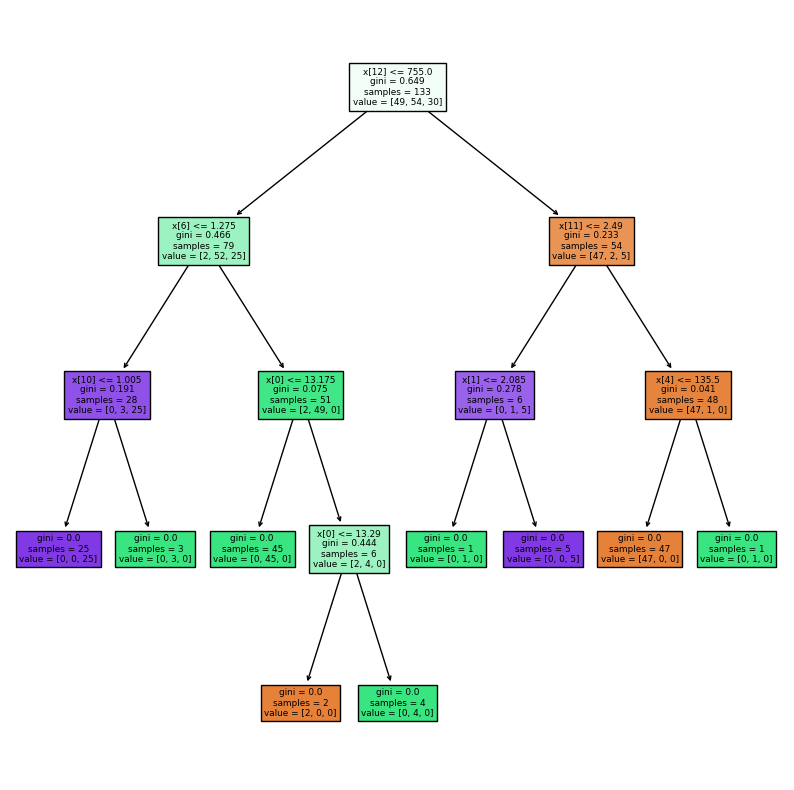

In [55]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(dt,filled=True)
plt.show()

지니불순도 = 1- (클래스1비율^2 + 클래스2비율^2 + 클래스3비율^2)
1 -( (49/133)^2 + (54/133)^2 + (30/133)^2 ) = 133


In [45]:
dt.feature_importances_

array([0.0445552 , 0.01932241, 0.        , 0.        , 0.02270383,
       0.        , 0.32009323, 0.        , 0.        , 0.        ,
       0.06210774, 0.1035359 , 0.42768168])

In [47]:
importance_index = np.argsort(dt.feature_importances_)[::-1]
importance_index


array([12,  6, 11, 10,  0,  4,  1,  9,  8,  7,  5,  3,  2])

In [48]:
importanceTop6 = importance_index[:6]
importanceTop6

array([12,  6, 11, 10,  0,  4])

In [51]:
np.array(wine.feature_names)[importanceTop6]

array(['proline', 'flavanoids', 'od280/od315_of_diluted_wines', 'hue',
       'alcohol', 'magnesium'], dtype='<U28')

결정트리에서 과적합 방지
  - 가지치기

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=100)
dt.fit(x_train,y_train)
dt.score(x_train,y_train),  dt.score(x_test,y_test)

(0.9849624060150376, 0.7777777777777778)